# Session 2: Assignment Answers

Apply session 2 material to create a remote model-based Tornado and local dataset-based Tornado with the given information and get hazard values from created hazards

**Agenda**
- [1. Create a model-based Tornado (Remote)](#1.-Create-a-model-based-Tornado-(Remote))
- [2. Create a dataset-based Tornado (Local)](#2.-Create-a-dataset-based-Tornado-(Local))

Please follow the instruction at each cell.

## 1. Create a model-based Tornado (Remote)

Using the data from section 2.1.2, slightly alter the values of the Centerville tornado and obtain a new set of
parameters that differ from the previously seen examples.

Tornado model definition:
* Tornado Model: MeanWidthTornado
* EF Rating: EF3
* Start point of path: 
    * Latitude:
    * Longitude: 
* End point of path:
    * Latitude:
    * Longitude: 
* Wind speed method: 1
* number of simulation: 1
* random seed: 2023

After you have obtained them, proceed as shown during the session.

In [10]:
# Import modules
from pyincore import HazardService, IncoreClient
import json

In [11]:
# Connect to IN-CORE serivce by creating IncoreClient
client = IncoreClient()

# Create the HazardService object
hazardsvc = HazardService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.15.1


In [12]:
# TODO: create a JSON (dictionary) definition of tornado model as given above
my_tornado_model = {
  "name": "Centerville Model Tornado (modified)",
  "description": "Centerville mean width tornado hazard",
  "tornadoType": "model",
  "tornadoModel" : "MeanWidthTornado",
      "tornadoParameters" : {
      "efRating" : "EF3",
      "startLatitude" : "35.215",
      "startLongitude" : "-97.524",
      "randomSeed" : "2023",
      "endLatitude" : [35.253],
      "endLongitude" : [-97.432],
      "windSpeedMethod" : "1",
      "numSimulations" : "1"
    }
}
tornado_model_json = json.dumps(my_tornado_model, indent=4)

In [13]:
# TODO: create a tornado using the hazard service
model_response = hazardsvc.create_tornado_scenario(tornado_model_json)
print(json.dumps(model_response, indent=4, sort_keys=False))

{
    "tornadoType": "model",
    "id": "65ccfa2ad61b8f0bb597b153",
    "name": "Centerville Model Tornado (modified)",
    "description": "Centerville mean width tornado hazard",
    "creator": "cwang138",
    "owner": "cwang138",
    "threshold": null,
    "thresholdUnit": "mph",
    "spaces": [
        "cwang138"
    ],
    "date": "2024-02-14T17:36:41+0000",
    "tornadoModel": "MeanWidthTornado",
    "tornadoParameters": {
        "efRating": "EF3",
        "maxWindSpeed": 250.0,
        "startLatitude": 35.215,
        "startLongitude": -97.524,
        "randomSeed": 2023,
        "windSpeedMethod": 1,
        "numSimulations": 1,
        "endLatitude": [
            35.253
        ],
        "endLongitude": [
            -97.432
        ]
    },
    "tornadoWidth": [
        413.78265910931174
    ],
    "efBoxes": [
        {
            "efBoxWidths": [
                0.0006292397330261612,
                0.0010052942480299617,
                0.0014930481239259802,
        

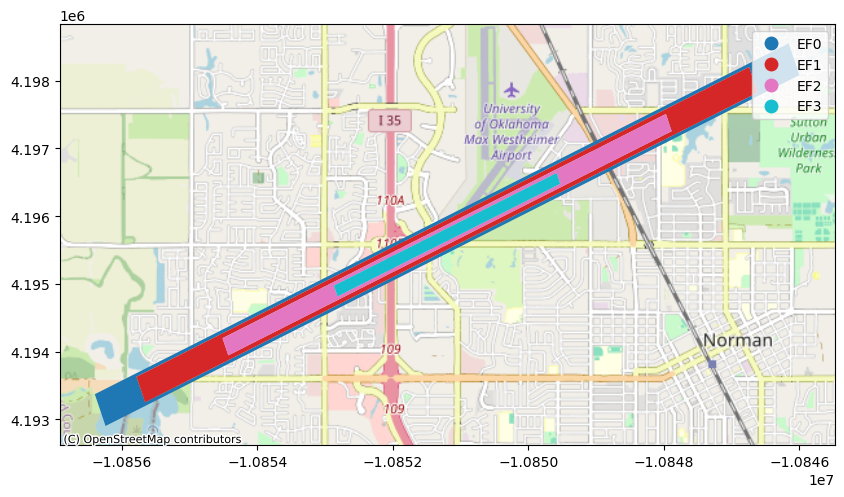

In [14]:
# TODO: acquire hazard id you created and visualize
tornado_model_id = model_response['id']
from pyincore_viz.geoutil import GeoUtil as viz
viz.plot_tornado(tornado_model_id, client, basemap=True)

In [15]:
# TODO: Getting and printing hazard value from your tornado
points = [
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "35.215, -97.521"
    },
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "35.233, -97.479"
    }
]

tornado_model_vals = hazardsvc.post_tornado_hazard_values(tornado_model_id, points)
print(json.dumps(tornado_model_vals, indent=4, sort_keys=False))

[
    {
        "hazardValues": [
            82.54130976754479
        ],
        "demands": [
            "Wind"
        ],
        "units": [
            "mph"
        ],
        "loc": "35.215, -97.521"
    },
    {
        "hazardValues": [
            139.8882517057174
        ],
        "demands": [
            "Wind"
        ],
        "units": [
            "mph"
        ],
        "loc": "35.233, -97.479"
    }
]


## 2. Create a dataset-based Tornado (Local)

Now, using the dataset-based tornado definition seen in section 3.1.1, define a new local tornado hazard and get values for the same location with and without a seed parameter.

Proceed as in the prior exercise.

In [16]:
# Import modules
from pyincore import Tornado
import os

In [17]:
# TODO: indicate the path of the tornado dataset files
dir = "data/hazard/tornado/"

In [18]:
# TODO: create the tornado object with definition
tornado = Tornado.from_json_file(os.path.join(dir, "tornado_dataset.json"))

# TODO: attach the shapefile representing the tornado
tornado.hazardDatasets[0].from_file((os.path.join(dir, "joplin_path_wgs84.shp")),
                                    data_type="incore:tornadoWindfield")

In [19]:
# TODO: Getting and printing hazard value from your tornado for specific seed value
payload = [
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "-94.37, 37.04"
    }
]

# get values
values = tornado.read_hazard_values(payload, seed=1234) # removing the seed will give random values
print(values)

[{'demands': ['wind'], 'units': ['mph'], 'loc': '-94.37, 37.04', 'hazardValues': [None]}]


In [20]:
# TODO: Getting and printing hazard values from your tornado for a random seed value
payload = [
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "-94.37, 37.04"
    }
]

# get values
values = tornado.read_hazard_values(payload) # removing the seed will give random values
print(values)

[{'demands': ['wind'], 'units': ['mph'], 'loc': '-94.37, 37.04', 'hazardValues': [None]}]


In [21]:
# TODO: Visualize the tornado using GeoDataFrame.explore(), see section 3.2.1 for getting the geodataframe
tornado_gdf = tornado.hazardDatasets[0].dataset.get_dataframe_from_shapefile()
tornado_gdf.explore()